## Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Data

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Analyze data & target, then merge

In [4]:
columnsx = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
dfx = pd.DataFrame(data=iris.data, columns=columnsx)
dfx

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
columnsy = ["class"]
dfy = pd.DataFrame(data=iris.target, columns=columnsy)
dfy

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
df = pd.merge(dfx, dfy, on=dfx.index).drop("key_0", axis=1)
df

ValueError: Unable to fill values because RangeIndex cannot contain NA

In [ ]:
# exclude the class
# plt.scatter(df.loc[:, df.columns!="class"]

In [8]:
from sklearn.model_selection import KFold

X, y = iris.data, iris.target

kfold = KFold(n_splits=2, random_state=42, shuffle=True)
kfold.get_n_splits(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

2

In [9]:
for train_idx, test_idx in kfold.split(X):
    print("TRAIN:", train_idx, "\nTEST:", test_idx)
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

TRAIN: [  1   2   3   5   6   7   8  13  14  17  20  21  34  35  37  38  41  43
  46  48  49  50  52  53  54  57  58  59  61  63  70  71  72  74  77  79
  80  83  84  87  88  89  90  91  92  93  98  99 100 102 103 106 107 111
 112 114 115 116 119 120 121 124 125 126 129 130 134 135 136 139 140 144
 147 148 149] 
TEST: [  0   4   9  10  11  12  15  16  18  19  22  23  24  25  26  27  28  29
  30  31  32  33  36  39  40  42  44  45  47  51  55  56  60  62  64  65
  66  67  68  69  73  75  76  78  81  82  85  86  94  95  96  97 101 104
 105 108 109 110 113 117 118 122 123 127 128 131 132 133 137 138 141 142
 143 145 146]
TRAIN: [  0   4   9  10  11  12  15  16  18  19  22  23  24  25  26  27  28  29
  30  31  32  33  36  39  40  42  44  45  47  51  55  56  60  62  64  65
  66  67  68  69  73  75  76  78  81  82  85  86  94  95  96  97 101 104
 105 108 109 110 113 117 118 122 123 127 128 131 132 133 137 138 141 142
 143 145 146] 
TEST: [  1   2   3   5   6   7   8  13  14  17  20  21  34  

## Visualize Features

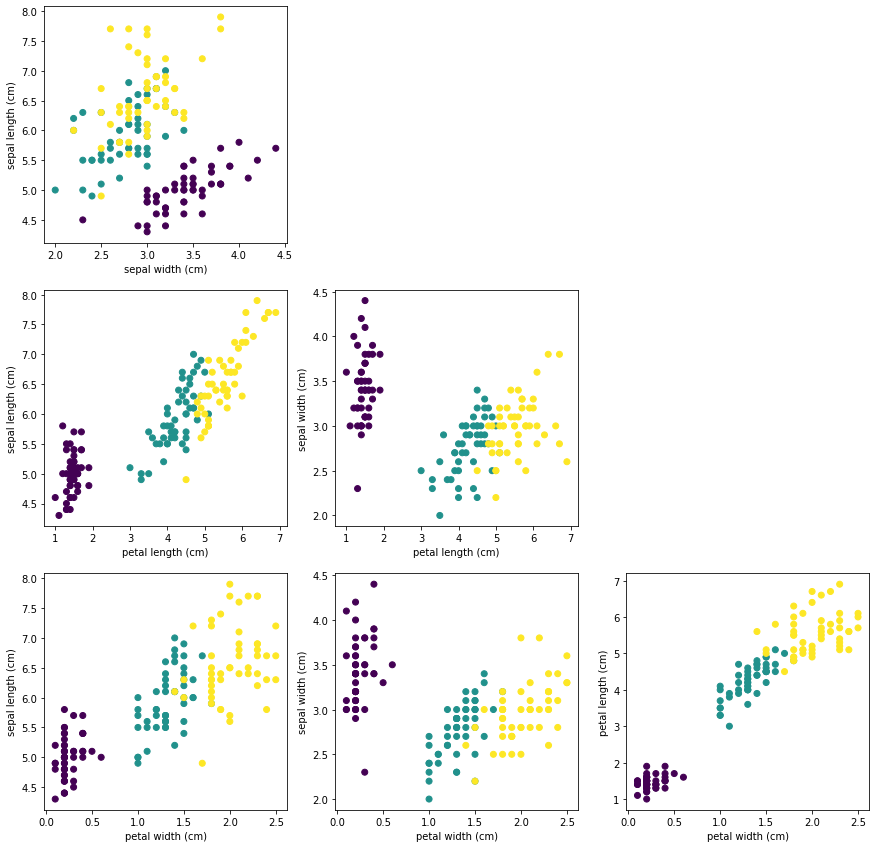

In [10]:
fig, ax = plt.subplots(4, 4, figsize = (20, 20))

for i in range(4):
    for j in range(4):
        ax[i, j].scatter(X[:, i], X[:, j], c=y)
        ax[i, j].set_xlabel(iris.feature_names[i])
        ax[i, j].set_ylabel(iris.feature_names[j])
        if j >= i:
            ax[i, j].set_visible(False)

## Normalize

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Classify

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.92

In [14]:
# acc is %100, splitting seed seems to be optimum at 42

In [15]:
y_predall = knn.predict(X_scaled)
accuracy_score(y, y_predall)

0.96

## KMeans

In [24]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

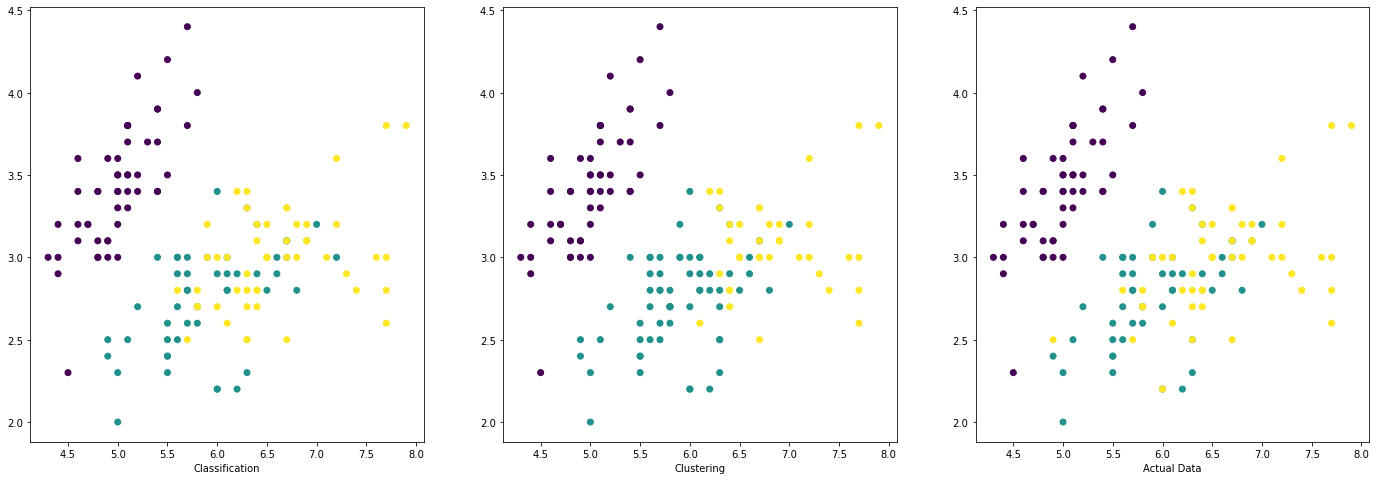

In [28]:
fig, ax = plt.subplots(1, 3, figsize = (24, 8))

ax[0].scatter(X[:, 0], X[:, 1], c=y_predall)
ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans)
ax[2].scatter(X[:, 0], X[:, 1], c=y)

ax[0].set_xlabel("Classification")
ax[1].set_xlabel("Clustering");
ax[2].set_xlabel("Actual Data");

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)